In [22]:
import pandas as pan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plotter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, RocCurveDisplay, ConfusionMatrixDisplay

In [2]:
matrix_data = pan.read_csv("gene_expression.csv")

In [8]:
matrix_data.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


(3.0, 8.0)

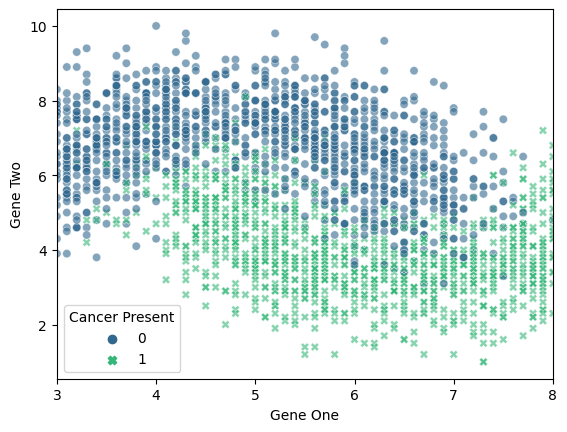

In [10]:
sns.scatterplot(x = matrix_data["Gene One"], y = matrix_data["Gene Two"], hue = matrix_data["Cancer Present"], palette = "viridis", alpha = 0.6, style = matrix_data["Cancer Present"])
plotter.xlim(3, 7)
plotter.xlim(3, 8)

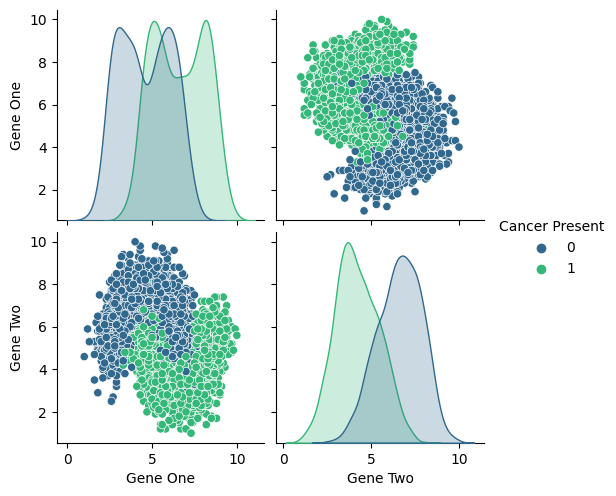

In [13]:
sns.pairplot(matrix_data, palette = "viridis", hue = "Cancer Present")

In [14]:
features = matrix_data.drop("Cancer Present", axis = 1)
label = matrix_data["Cancer Present"]


In [17]:
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size = 0.3, random_state = 42)
scaler = StandardScaler()
feature_train = scaler.fit_transform(feature_train)
feature_test = scaler.transform(feature_test)

In [19]:
kneighours_learner = KNeighborsClassifier()
kneighours_learner.fit(feature_train, label_train)

KNeighborsClassifier()

In [23]:
predictions = kneighours_learner.predict(feature_test)

In [25]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



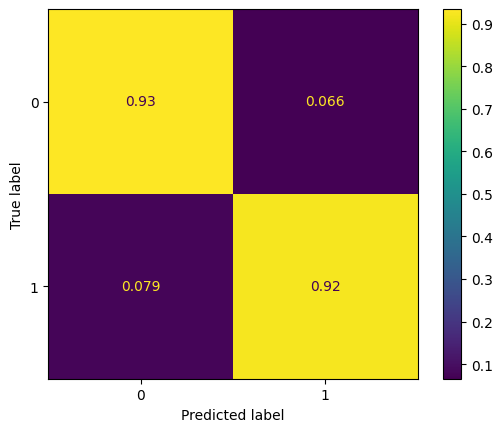

In [28]:
ConfusionMatrixDisplay.from_predictions(label_test, predictions, normalize = "true")

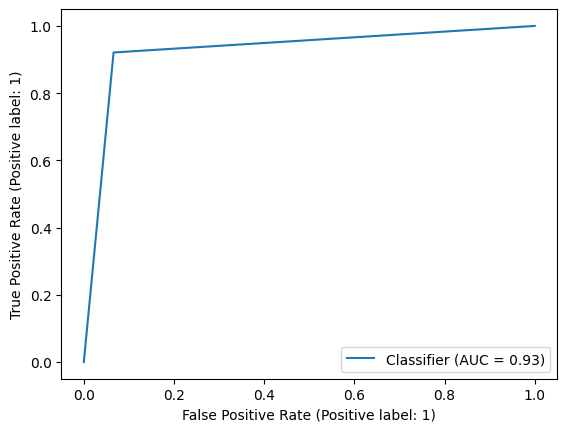

In [29]:
RocCurveDisplay.from_predictions(label_test, predictions)